# Laboratorium 4 - Random Projection
# Piotr Rząsa

Ćwiczenie na podstawie przygotowanej prezentacji i materiałów: <br>
https://github.com/Proniewicz/MRO_lab4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import random_projection
from sklearn.neighbors.dist_metrics import DistanceMetric
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from random import randint
from sklearn.decomposition import PCA as sklearnPCA

## Porównanie Random Projection dla danych o wielu wymiarach i danych o małej liczbie wymiarów.

### Dane o dużej liczbie wymiarów

In [2]:
LICZBA = 100
WYMIAR = 4000
L_KLAS = 2
ZABURZENIE = 3

NOWY_WYMIAR = 40

In [3]:
# mu_vec - współrzędne wokół których powinny się rozmieścić punkty
# cov_mat - jak bardzo powinny być rozrzucone względem każdego wymiaru po kolei

for i in range(L_KLAS):
    
    mu_vec2 = np.ones((WYMIAR,), dtype=np.int)
    mu_vec2 = np.multiply(mu_vec2, i*2)
    
    cov_mat2 = np.zeros((WYMIAR, WYMIAR), int)
    np.fill_diagonal(cov_mat2, 1)
    zabu = np.random.randint(ZABURZENIE, size=(WYMIAR, 1))
    cov_mat2 = np.multiply(cov_mat2, np.add(zabu,1))
    
    class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, LICZBA).T
    assert class2_sample.shape == (WYMIAR,LICZBA), "The matrix has not the right dimensions"

    # konkatenacja danych
    if(i == 0):
        all_samples = class2_sample
    else:
        all_samples = np.concatenate((all_samples, class2_sample), axis=1)

print(all_samples.shape)
assert all_samples.shape == (WYMIAR,LICZBA*L_KLAS), "The output matrix has not the right dimensions"


# wyliczenie odległości miedzy punktami
dist = DistanceMetric.get_metric('euclidean')
original_dist = dist.pairwise(all_samples.T)

(4000, 200)


In [4]:
# ploter PCA
sklearn_pca = sklearnPCA(n_components=2)

# plotowanie pca
def plotPCAMatrix(matrix, num, title):
    sklearn_transf = sklearn_pca.fit_transform(matrix)
    plt.subplot(1,3,num)

    plt.plot(sklearn_transf[0:LICZBA, 0], sklearn_transf[0:LICZBA, 1], 
             'o', markersize=7, color='blue', alpha=0.5)
    plt.plot(sklearn_transf[LICZBA:LICZBA * 2, 0], sklearn_transf[LICZBA:LICZBA * 2, 1], 
             '^', markersize=7, color='red', alpha=0.5)
    plt.title(title)

In [5]:
transformer = random_projection.SparseRandomProjection(n_components=NOWY_WYMIAR)
X_random = transformer.fit_transform(all_samples.T)

random_dist = dist.pairwise(X_random)

plt.figure(1, figsize=(15, 5))
plotPCAMatrix(all_samples.T, 1, 'PCA on original data')
plotPCAMatrix(X_random, 2, 'PCA after random projection')

Random projection 4000 dim -> 40 dim: 100% -> 1%


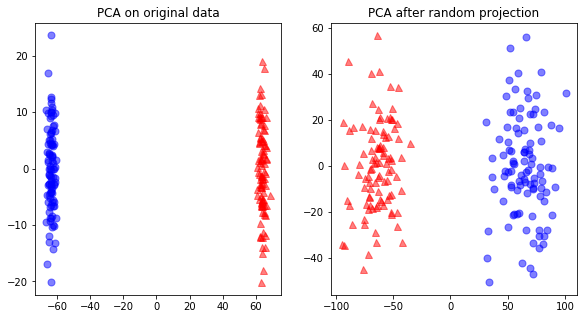

In [6]:
print("Random projection 4000 dim -> 40 dim: 100% -> 1%")

plt.show()

**Komentarz:**<br>
Widać na wykresie w miarę dokładnie, że dane zostały dość dobrze podzielone na dwa obszary i jesteśmy w stanie je zaklasyfikować. Dodatkowo spojrzenie na odległości pomiędzy punktami pozwala stwierdzić, że nie doszło do zaburzenia danych. Pozwala to stwierdzić, że dla danych o dużej liczbie wymiarów Random projecton działa naprawdę dobrze.

### Dane o mniejszej liczbie wymiarów zmniejszane do podobnego wymiaru.

In [7]:
LICZBA = 100
WYMIAR = 40
L_KLAS = 2
ZABURZENIE = 3

NOWY_WYMIAR = 4

In [8]:
# mu_vec - współrzędne wokół których powinny się rozmieścić punkty
# cov_mat - jak bardzo powinny być rozrzucone względem każdego wymiaru po kolei

for i in range(L_KLAS):
    
    mu_vec2 = np.ones((WYMIAR,), dtype=np.int)
    mu_vec2 = np.multiply(mu_vec2, i*2)
    
    cov_mat2 = np.zeros((WYMIAR, WYMIAR), int)
    np.fill_diagonal(cov_mat2, 1)
    zabu = np.random.randint(ZABURZENIE, size=(WYMIAR, 1))
    cov_mat2 = np.multiply(cov_mat2, np.add(zabu,1))
    
    class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, LICZBA).T
    assert class2_sample.shape == (WYMIAR,LICZBA), "The matrix has not the right dimensions"

    # konkatenacja danych
    if(i == 0):
        all_samples = class2_sample
    else:
        all_samples = np.concatenate((all_samples, class2_sample), axis=1)

print(all_samples.shape)
assert all_samples.shape == (WYMIAR,LICZBA*L_KLAS), "The output matrix has not the right dimensions"


# wyliczenie odległości miedzy punktami
dist = DistanceMetric.get_metric('euclidean')
original_dist = dist.pairwise(all_samples.T)

(40, 200)


In [23]:
transformer = random_projection.SparseRandomProjection(n_components=NOWY_WYMIAR)
X_random_bad = transformer.fit_transform(all_samples.T)

random_dist_bad = dist.pairwise(X_random_bad)

plt.figure(1, figsize=(15, 5))
plotPCAMatrix(all_samples.T, 1, 'PCA on original data')
plotPCAMatrix(X_random_bad, 2, 'PCA after random projection')

Random projection 40 dim -> 4 dim: 100% -> 10%


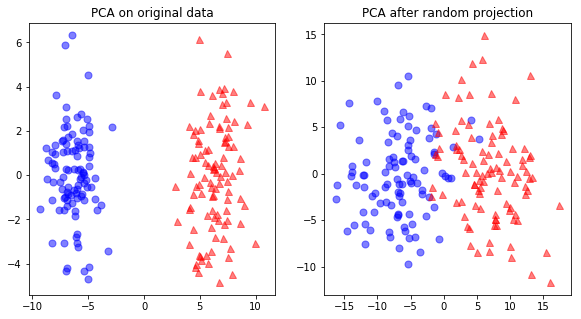

In [24]:
print("Random projection 40 dim -> 4 dim: 100% -> 10%")
plt.show()

**Komentarz:**<br>
Przy drastycznie mniejszym wymiarze danych wejściowych, zmniejszenie wymiaru o podobny rząd wielkości jak wcześniej powoduje, że następuje zaburzenie danych. To pozwala podejrzewać, że Random projection działa dobrze dla danych o większym wymiarze, oraz dla zmiany wymiaru na wciąż dość wysoki. W inny przypadku zaburzają się odległości pomiędzy punktami.

## Rekonstrukcja sygnału

In [11]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.fftpack import dct, idct, fft
from scipy.sparse import coo_matrix
from sklearn.linear_model import Lasso

### Parametry genereowanego sygnału, liczba próbek oraz odpowiednie wykresy:

In [25]:
Fs = 40000  #Sample rate
duration = 1./4 #Duration of time frame

N_samps = np.math.floor(duration*Fs)
M = 500   # Number of compressed "basis" functions - we're going from N_samps to M samps.

f1 = 200
f2 = 550

#print ("Compression ratio {0}".format(M/N_samps))

In [26]:
t = np.linspace(0,duration,N_samps)

X = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

plt.figure(figsize=[10,4])
plt.title('Sygnał źródłowy')
plt.xlabel('Czas (s)')
plt.ylabel('X(t)')
plt.plot(t,X)



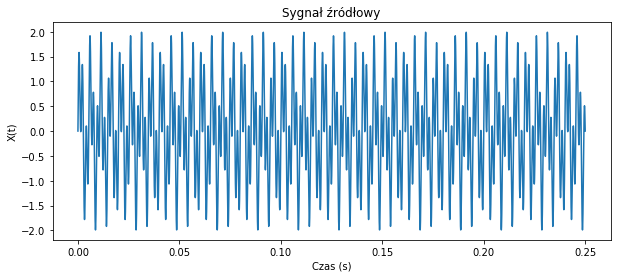

In [27]:
plt.show()

#### Losowo wybrane punkty do próbkowania sygnału

In [28]:
yi = np.random.randint(0,N_samps,(M,))
yi = np.sort(yi)
Y = X[yi]

plt.figure(figsize=[10,4])
plt.plot(t,X,'b',t[yi],Y,'r.')
plt.title('Sygnał źródłowy z zaznaczonymi punktami próbkowania')
plt.xlabel('Czas (s)')
plt.ylabel('X(t) i X(losowe próbki)')


Text(0,0.5,'X(t) i X(losowe próbki)')

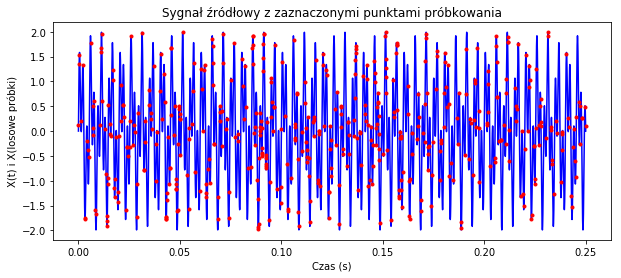

In [29]:
plt.show()

In [30]:
D = dct(np.eye(N_samps))   # Construct the DCT basis functions for each of the frequencies
A = D[yi]                  # Downsample based on our random sampling

np.shape(A)

lasso = Lasso(alpha=0.01)
lasso.fit(A,Y)
Xhat = idct(lasso.coef_)

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(t,Xhat)
plt.title('Sygnał zrekonstruowany')
plt.subplot(1,2,2)
plt.plot(t,Xhat-X)
plt.title('Delta błędu')


Text(0.5,1,'Delta błędu')

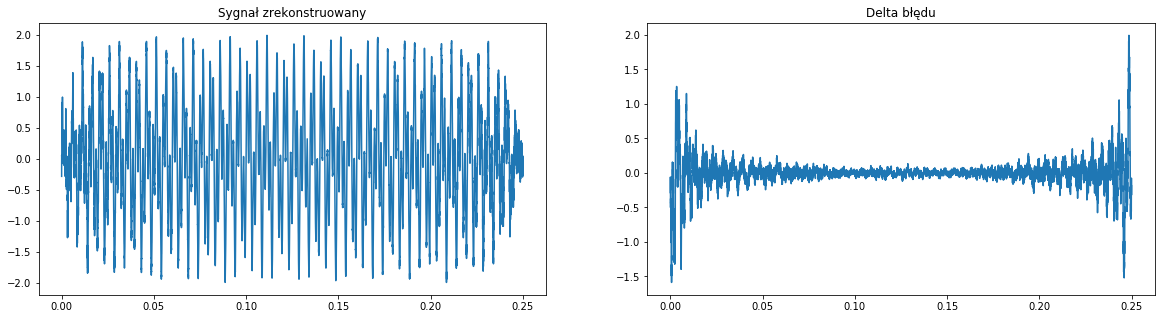

In [31]:
plt.show()

**Ponieważ sygnał jest ciągły, pomijamy początkowy i końcowy fragment (po 10% sygnału)**

In [32]:
plt.figure(figsize=[10,5])
plt.plot(t[1000:9000],X[1000:9000])
plt.plot(t[1000:9000],Xhat[1000:9000])
plt.title("Zrekonstruowany sygnał nałożony na oryginalny")

Text(0.5,1,'Zrekonstruowany sygnał nałożony na oryginalny')

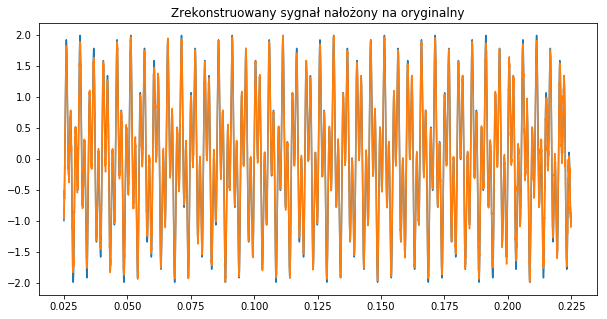

In [33]:
plt.show()

In [34]:
error = np.sum(np.absolute(Xhat-X)) / N_samps
error2 = np.sum(np.absolute(Xhat[1000:9000]-X[1000:9000])) / (N_samps-2000)

In [35]:
print ("Sygnał został zrekonstruowany przy użyciu {0}% danych.".format(100.*M/N_samps))
print ("Błąd dla całości sygnału wyniósł %0.4f." % error)
print ("Błąd dla środkowej części sygnału wyniósł %0.4f." % error2)

Sygnał został zrekonstruowany przy użyciu 5.0% danych.
Błąd dla całości sygnału wyniósł 0.1012.
Błąd dla środkowej części sygnału wyniósł 0.0499.
